In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("G:/Files/Data Science Bootcamp/Python/Group Assigmnent/train.csv")
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [6]:
df.shape

(36992, 25)

In [7]:
df.info()
# Based on the dataframe info the column "region_category", "preferred_offer_types" and "point_in_wallet" do seem to have null values. Further investigation is required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [8]:
df.drop_duplicates(inplace=True)
# drop duplicate items if there are any

In [9]:
df.isnull().sum()
# Assumption is correct! 

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

##### There are 3 different ways to handle missing data. The first one is accepting the missing data, the second one is deletion whether that be listwise deletion or pairwise deletion, and the last being imputation. For this case, the first and the second are not practical since we don't know how the missing values would impact the final result and can lead to significant loss of information for the second case. Deduction would dictate that imputation would be the right approach.

In [10]:
df['region_category'].value_counts()
# Since "region_category" is a categorical feature as the name suggests, mode imputaion is best to use in this case.

region_category
Town       14128
City       12737
Village     4699
Name: count, dtype: int64

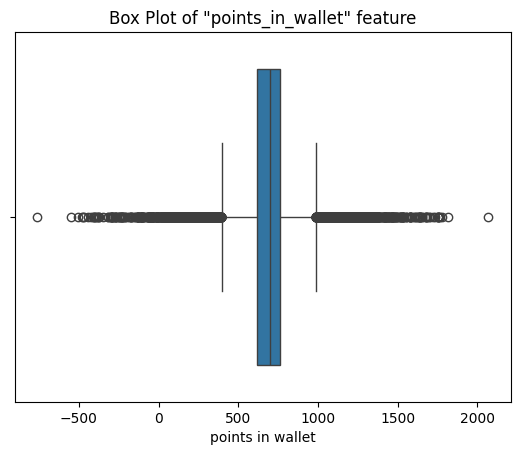

In [11]:
points_in_wallet = df['points_in_wallet']
sns.boxplot(x=points_in_wallet,)
plt.title(f'Box Plot of "points_in_wallet" feature')
plt.xlabel('points in wallet')
plt.show()
# "points_in_wallet" has an ineger datatype with some outliers and not a normal distribution. Median imputation will be used to fill null values

In [12]:
df['preferred_offer_types'].value_counts()
# "preferred_offer_types" categorical data subset with a normal distribution. Mode imputation will be used.

preferred_offer_types
Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: count, dtype: int64

In [13]:
df['region_category'].fillna(df['region_category'].mode()[0], inplace=True)
df['points_in_wallet'].fillna(df['points_in_wallet'].median(), inplace=True)
df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0], inplace=True)

In [14]:
df.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

#### Lets delve deep into the data for some data cleaning

In [15]:
count = (df['referral_id'] == 'No referral').sum()
print(f"Count of 'No referral': {count}")

Count of 'No referral': 5


In [16]:
'''
A correlation can be seen between 'joined_through_referral' and 'referral_id' features. From the referral ID with 'xxxxxxxx' it can be deduced that the customer did not come through referral and
a value othrewise would mean that a customer came through referral so values should be changedas such.
'''
# standardizing the 'No referral' subset to 'xxxxxxxx' format
for x in df.index:
    if df.loc[x, "referral_id"] == 'No referral':
        df.replace('No referral','xxxxxxxx', inplace=True)

# Data having 'xxxxxxxx' in referral_id feature the corresponding 'joined_through_referral' feature values should be changed to 'No'
for x in df.index:
    if df.loc[x, "referral_id"] == 'xxxxxxxx':
        df.loc[x, "joined_through_referral"] = 'No'

# Data having values other than 'xxxxxxxx' in referral_id feature the corresponding 'joined_through_referral' feature values should be changed to 'Yes'
for x in df.index:
    if df.loc[x, "referral_id"] != 'xxxxxxxx':
        df.loc[x, "joined_through_referral"] = 'Yes'
df.head(n=100)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,Yes,CID21329,...,306.34,12838.38,10.0,697.620000,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,fffe43004900440034003500340034003700,Annelle Thiele,56,M,CFXGFEO,Village,Basic Membership,2017-08-22,Yes,CID11447,...,48.59,28071.04,16.0,533.050000,No,Yes,Yes,Solved,Poor Website,5
96,fffe43004900440033003500390038003700,Araceli Rojo,17,M,Y2PJ70L,Town,Basic Membership,2016-12-28,Yes,CID52970,...,30.12,15027.14,12.0,697.620000,No,Yes,No,Not Applicable,No reason specified,5
97,fffe43004900440031003900350034003100,Zoe Risk,23,F,JAWMYHN,Town,Gold Membership,2016-08-04,Yes,CID3210,...,727.69,4919.72,13.0,758.830000,Yes,Yes,No,Not Applicable,Too many ads,3
98,fffe43004900440034003300380038003400,Antonietta Burson,42,F,V8LT71V,City,No Membership,2016-06-23,No,xxxxxxxx,...,419.51,14661.42,Error,404.489758,No,Yes,Yes,Solved in Follow-up,No reason specified,5


In [17]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [18]:
df['medium_of_operation'].value_counts()

medium_of_operation
Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: count, dtype: int64

In [19]:
# Changing the '?' value to 'unknown' to standardize it.
df['medium_of_operation'].replace('?', 'Unknown', inplace=True)

1.2 Data Type Correction

In [20]:
df[['joining_date']].head()

,joining_date
0,2017-08-17
1,2017-08-28
2,2016-11-11
3,2016-10-29
4,2017-09-12


In [21]:
df[['last_visit_time']].head()

,last_visit_time
0,16:08:02
1,12:38:13
2,22:53:21
3,15:57:50
4,15:46:44


In [22]:
# Convert 'joining_date' to datetime format
df['joining_date'] = pd.to_datetime(df['joining_date'], format='%Y-%m-%d')

#  Convert 'last_visit_time' to time format (Hour : Minute: Second)
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'], format='%H:%M:%S').dt.time

# Convert 'avg_frequency_login_days' to numerical (float), 
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_id                   36992 non-null  object        
 1   Name                          36992 non-null  object        
 2   age                           36992 non-null  int64         
 3   gender                        36992 non-null  object        
 4   security_no                   36992 non-null  object        
 5   region_category               36992 non-null  object        
 6   membership_category           36992 non-null  object        
 7   joining_date                  36992 non-null  datetime64[ns]
 8   joined_through_referral       36992 non-null  object        
 9   referral_id                   36992 non-null  object        
 10  preferred_offer_types         36992 non-null  object        
 11  medium_of_operation         

In [23]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

1.3 Encoding Categorical Data: One-Hot incoding

In [24]:
# Categorical features bunduled up together to compress the code into one output. NaN signifies category not found in the particular feature. 
df[['region_category', 'gender', 'membership_category', 'joined_through_referral', 'medium_of_operation']].apply(pd.value_counts)


,region_category,gender,membership_category,joined_through_referral,medium_of_operation
Basic Membership,NaN,NaN,7724.0,NaN,NaN
Both,NaN,NaN,NaN,NaN,3810.0
City,12737.0,NaN,NaN,NaN,NaN
Desktop,NaN,NaN,NaN,NaN,13913.0
F,NaN,18490.0,NaN,NaN,NaN
Gold Membership,NaN,NaN,6795.0,NaN,NaN
M,NaN,18443.0,NaN,NaN,NaN
No,NaN,NaN,NaN,17851.0,NaN
No Membership,NaN,NaN,7692.0,NaN,NaN
Platinum Membership,NaN,NaN,4338.0,NaN,NaN


In [25]:
# Categorical features bunduled up together to compress the code into one output. NaN signifies category not found in the particular feature.
df[['internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'feedback']].apply(pd.value_counts)

,internet_option,used_special_discount,offer_application_preference,past_complaint,feedback
Fiber_Optic,12236.0,NaN,NaN,NaN,NaN
Mobile_Data,12343.0,NaN,NaN,NaN,NaN
No,NaN,16650.0,16552.0,18602.0,NaN
No reason specified,NaN,NaN,NaN,NaN,6290.0
Poor Customer Service,NaN,NaN,NaN,NaN,6252.0
Poor Product Quality,NaN,NaN,NaN,NaN,6350.0
Poor Website,NaN,NaN,NaN,NaN,6271.0
Products always in Stock,NaN,NaN,NaN,NaN,1382.0
Quality Customer Care,NaN,NaN,NaN,NaN,1360.0
Reasonable Price,NaN,NaN,NaN,NaN,1417.0


In [26]:
# Label incoding chosen not to increase the number of features 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['region_category'] = le.fit_transform(df['region_category'])
df['gender'] = le.fit_transform(df['gender'])
df['membership_category'] = le.fit_transform(df['membership_category'])
df['joined_through_referral'] = le.fit_transform(df['joined_through_referral'])
df['medium_of_operation'] = le.fit_transform(df['medium_of_operation'])
df['internet_option'] = le.fit_transform(df['internet_option'])
df['used_special_discount'] = le.fit_transform(df['used_special_discount'])
df['offer_application_preference'] = le.fit_transform(df['offer_application_preference'])
df['complaint_status'] = le.fit_transform(df['complaint_status'])
df['feedback'] = le.fit_transform(df['feedback'])
df.drop(labels='past_complaint', axis=1, inplace=True) # The 'complaint_status' column by itself is sufficent to provide info on complaints
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,0,XW0DQ7H,2,3,2017-08-17,0,xxxxxxxx,...,17,300.63,53005.25,17.0,781.75,1,1,1,4,2
1,fffe43004900440032003100300035003700,Traci Peery,32,0,5K0N3X1,0,4,2017-08-28,1,CID21329,...,16,306.34,12838.38,10.0,697.62,1,0,2,5,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,0,1F2TCL3,1,2,2016-11-11,1,CID12313,...,14,516.16,21027.00,22.0,500.69,0,1,3,3,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,1,VJGJ33N,0,2,2016-10-29,1,CID3793,...,11,53.27,25239.56,6.0,567.66,0,1,4,3,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,0,SVZXCWB,0,2,2017-09-12,0,xxxxxxxx,...,20,113.13,24483.66,16.0,663.06,0,1,2,3,5


1.4 Outlier Detection and Handeling

In [27]:
df.info()
columns = ['age', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_id                   36992 non-null  object        
 1   Name                          36992 non-null  object        
 2   age                           36992 non-null  int64         
 3   gender                        36992 non-null  int64         
 4   security_no                   36992 non-null  object        
 5   region_category               36992 non-null  int64         
 6   membership_category           36992 non-null  int64         
 7   joining_date                  36992 non-null  datetime64[ns]
 8   joined_through_referral       36992 non-null  int64         
 9   referral_id                   36992 non-null  object        
 10  preferred_offer_types         36992 non-null  object        
 11  medium_of_operation         

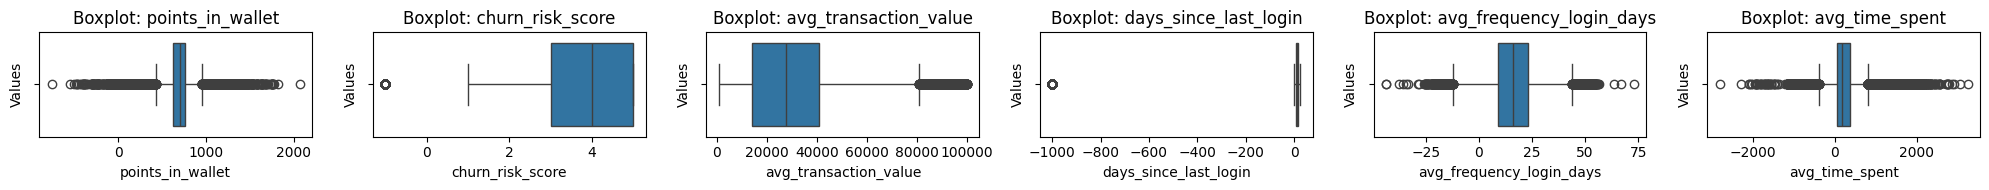

In [28]:
columns_to_plot = ['points_in_wallet', 'churn_risk_score', 'avg_transaction_value', 'days_since_last_login', 'avg_frequency_login_days', 'avg_time_spent']

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(20, 2))

# Loop through each column and create a boxplot
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col], ax=axes[i])

    # Customize the subplot
    axes[i].set_title(f'Boxplot: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')

# Adjust spacing between subplots
plt.tight_layout()

##### Outliers can be observed from the selected boxplot features. Outliers will be capped or trimmed after splitting the dataset into test and train.
##### Note: Trimming or capping , depending on the situation, will be implemented on the training dataset and not the testing dataset.

1.4 Feature Selection

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Handle non-numeric values in 'avg_frequency_login_days'
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce')

columns_to_normalize = ['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']

# Normalize the selected columns
normalized_values = scaler.fit_transform(df[columns_to_normalize])

# Create a DataFrame from the normalized values
normalized_df = pd.DataFrame(normalized_values, columns=columns_to_normalize)

# Calculate the engagement score as the average of the normalized values
df['engagement_score'] = normalized_df.mean(axis=1)
df

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,complaint_status,feedback,churn_risk_score,engagement_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,0,XW0DQ7H,2,3,2017-08-17,0,xxxxxxxx,...,300.630000,53005.25,17.0,781.750000,1,1,1,4,2,0.526579
1,fffe43004900440032003100300035003700,Traci Peery,32,0,5K0N3X1,0,4,2017-08-28,1,CID21329,...,306.340000,12838.38,10.0,697.620000,1,0,2,5,1,0.403073
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,0,1F2TCL3,1,2,2016-11-11,1,CID12313,...,516.160000,21027.00,22.0,500.690000,0,1,3,3,5,0.440704
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,1,VJGJ33N,0,2,2016-10-29,1,CID3793,...,53.270000,25239.56,6.0,567.660000,0,1,4,3,5,0.403846
4,fffe43004900440031003900350030003600,Meghan Kosak,31,0,SVZXCWB,0,2,2017-09-12,0,xxxxxxxx,...,113.130000,24483.66,16.0,663.060000,0,1,2,3,5,0.434261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,fffe43004900440035003500390036003100,Cuc Tarr,46,0,6F51HFO,1,0,2017-09-21,0,xxxxxxxx,...,-650.682759,27277.68,6.0,639.510000,0,1,0,0,4,0.386244
36988,fffe43004900440033003500380036003600,Jenni Stronach,29,0,21KSM8Y,1,0,2016-06-27,0,xxxxxxxx,...,-638.123421,11069.71,28.0,527.990000,1,0,1,1,5,0.383152
36989,fffe4300490044003500330034003100,Luciana Kinch,23,0,XK1IM9H,1,0,2016-09-11,1,CID3838,...,154.940000,38127.56,NaN,680.470000,0,1,4,3,4,0.458890
36990,fffe43004900440031003200390039003000,Tawana Ardoin,53,1,K6VTP1Z,2,3,2017-06-15,0,xxxxxxxx,...,482.610000,2378.86,20.0,197.264414,1,1,1,0,3,0.361189


---

# Step 2 - Exploratory Data Analysis (EDA)

In [60]:
# Statstical summaries
selected_features_1 = ['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'last_visit_time']
df[selected_features_1].describe()

,avg_time_spent,avg_transaction_value,avg_frequency_login_days
count,36992.000000,36992.000000,33470.000000
mean,243.472334,29271.194003,15.976715
std,398.289149,19444.806226,9.215858
min,-2814.109110,800.460000,-43.652702
25%,60.102500,14177.540000,9.000000
50%,161.765000,27554.485000,16.000000
75%,356.515000,40855.110000,23.000000
max,3235.578521,99914.050000,73.061995


In [59]:
# Visualization fo some features
selected_features_2 = df[['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'churn_risk_score']]
selected_features_2.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
0,18,17,300.63,53005.25,781.75,2
1,32,16,306.34,12838.38,697.62,1
2,44,14,516.16,21027.00,500.69,5
3,37,11,53.27,25239.56,567.66,5
4,31,20,113.13,24483.66,663.06,5


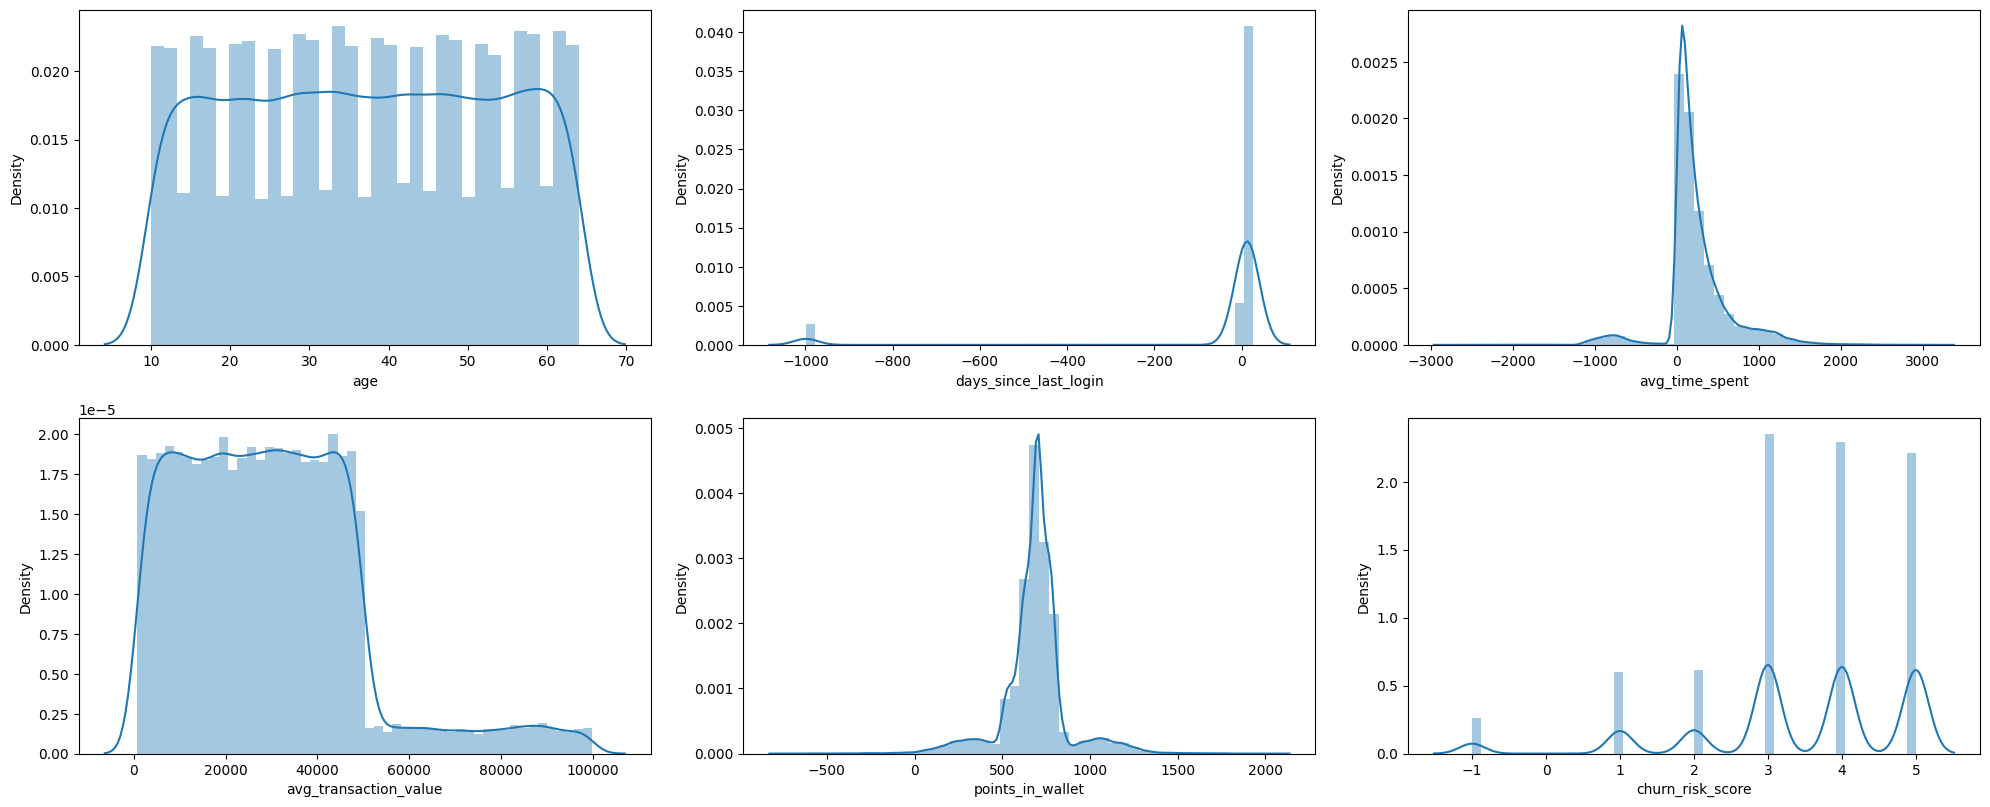

In [32]:
# Visualization fo some features
plt.figure(figsize=(20,20), facecolor='white')
i = 1

for features in selected_features_2:
    if i <= 15:
        ax = plt.subplot(5,3,i)
        sns.distplot(selected_features_2[features]) # distplot has been depricated for the latest version but it can be useful to show the distribution and histogram on the same plot.
        plt.xlabel(features, fontsize = 10)
        
    i+=1
plt.tight_layout()

<Axes: >

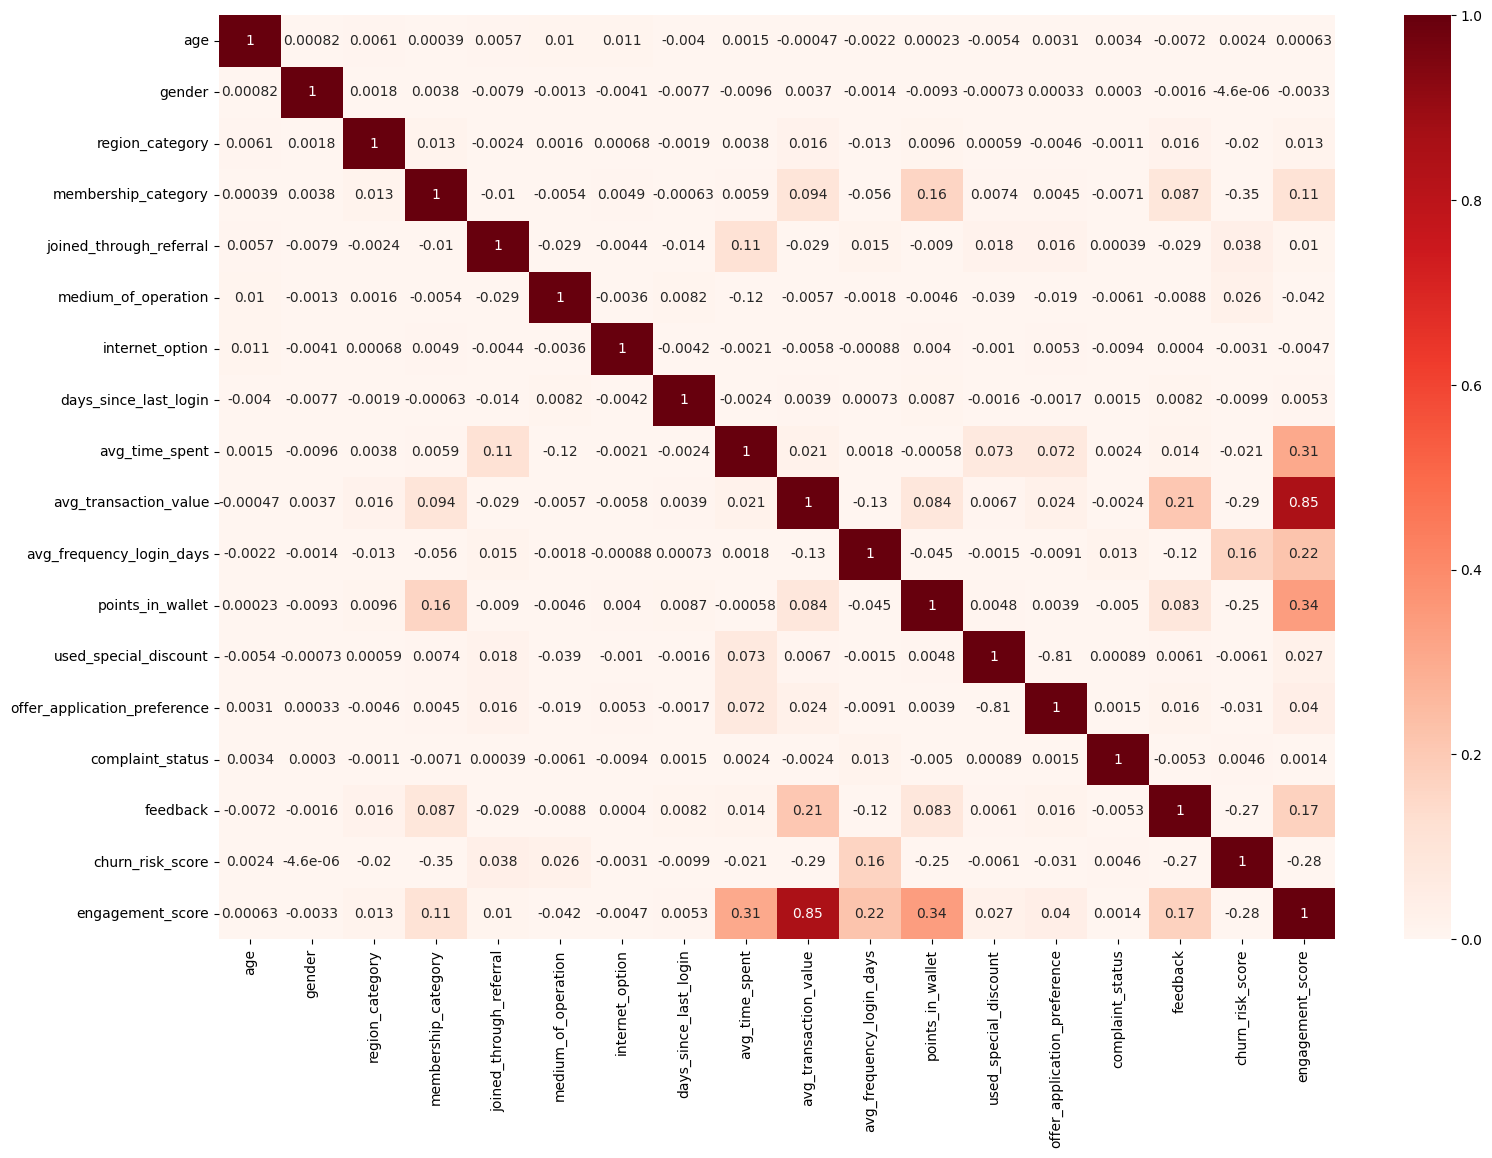

In [75]:
# Heatmap of features to identify relationship and nexus
df_1 = df.select_dtypes(include = ['float64', 'int64'])
corr = df_1.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr, cmap='Reds', annot=True, vmin=0, vmax=1, robust=False)

---

# Step 3: Feature Selection and Data Splitting